# Exploratory analysis of the dengAI dataset

In [389]:
% matplotlib  inline

import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

In [158]:
def load_data():
    data_dir = './data/input'
    train_features_csv = f'{data_dir}/dengue_features_train.csv'
    train_labels_csv = f'{data_dir}/dengue_labels_train.csv'
    test_features_csv = f'{data_dir}/dengue_features_test.csv'
    
    train_features_df = pd.read_csv(train_features_csv)
    train_labels_df = pd.read_csv(train_labels_csv)
    test_features_df = pd.read_csv(test_features_csv)
   
    train_df = train_features_df.merge(train_labels_df, left_on=['city', 'year', 'weekofyear'], right_on=['city', 'year', 'weekofyear'])
    
    print(f'length train feature: {len(train_features_df)}')
    print(f'length train labels: {len(train_labels_df)}')
    print(f'length test feature: {len(test_features_df)}')
    print(f'length train merge: {len(train_df)}')
    
    return train_df, test_features_df

## Shape of data

In [159]:
train_df, test_df = load_data()

length train feature: 1456
length train labels: 1456
length test feature: 416
length train merge: 1456


In [162]:
print(f'train set: {train_df.shape}')
print(f'test set: {test_df.shape}')

train set: (1456, 25)
test set: (416, 24)


In [163]:
train_df.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


In [160]:
train_df.columns

Index(['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'total_cases'],
      dtype='object')

**Define some groups for these columns to ease possible future manipulations**

In [297]:
station_cols = [col for col in train_df if col.startswith('station')]
forecast_cols = [col for col in train_df if col.startswith('reanalysis')]
ndvi_cols = [col for col in train_df if col.startswith('ndvi')]
precipitation_cols = [col for col in train_df if col.startswith('precipitation')]
cols_dict = {'station_cols': station_cols, 'forecast_cols': forecast_cols, 'ndvi_cols': ndvi_cols, 'precipitation_cols':precipitation_cols}

### Focus on year city component

In [164]:
print(train_df.groupby(by=['city','year']).size())
print(test_df.groupby(['city', 'year']).size())

city  year
iq    2000    26
      2001    52
      2002    52
      2003    52
      2004    52
      2005    52
      2006    52
      2007    52
      2008    52
      2009    52
      2010    26
sj    1990    35
      1991    52
      1992    52
      1993    52
      1994    52
      1995    52
      1996    52
      1997    52
      1998    52
      1999    52
      2000    52
      2001    52
      2002    52
      2003    52
      2004    52
      2005    52
      2006    52
      2007    52
      2008    17
dtype: int64
city  year
iq    2010    26
      2011    52
      2012    52
      2013    26
sj    2008    35
      2009    52
      2010    52
      2011    52
      2012    52
      2013    17
dtype: int64


In [165]:
print(train_df.groupby(by=['city']).size())
print(test_df.groupby(by=['city']).size())

city
iq    520
sj    936
dtype: int64
city
iq    156
sj    260
dtype: int64


**We see that initial year for training is truncated, as well as ending year for testing.**

**The training and testing sets doesn't seem to overlap.**

### year, weeofyear and week_start_date

Check if we have a mismatch between pandas datetime conversion output with the information in the dataframe.

In [168]:
train_df.week_start_date = pd.to_datetime(train_df.week_start_date)

In [169]:
sum((train_df.week_start_date.dt.weekofyear!=train_df.weekofyear) | (train_df.week_start_date.dt.year!=train_df.year))

0

## Missing values

In [300]:
pd.concat([pd.Series(train_df.isna().sum(), name='train_NAN'),
           pd.Series(train_df.count(), name='train_OK'),
           pd.Series(test_df.isna().sum(), name='test_NAN'),
           pd.Series(test_df.count(), name='test_OK')
          ], axis=1, sort=True)

,train_NAN,train_OK,test_NAN,test_OK
city,NaN,NaN,0.0,416.0
ndvi_ne,194.0,1262.0,43.0,373.0
ndvi_nw,52.0,1404.0,11.0,405.0
ndvi_se,22.0,1434.0,1.0,415.0
ndvi_sw,22.0,1434.0,1.0,415.0
precipitation_amt_mm,13.0,1443.0,2.0,414.0
reanalysis_air_temp_k,10.0,1446.0,2.0,414.0
reanalysis_avg_temp_k,10.0,1446.0,2.0,414.0
reanalysis_dew_point_temp_k,10.0,1446.0,2.0,414.0
reanalysis_max_air_temp_k,10.0,1446.0,2.0,414.0


In [330]:
train_df[train_df.reanalysis_air_temp_k.isna()]

year  weekofyear   ndvi_ne   ndvi_nw   ndvi_se  \
city week_start_date                                                   
iq   2004-01-01       2004           1  0.202571  0.198967  0.244557   
     2005-01-01       2005          53       NaN       NaN       NaN   
     2009-01-01       2009           1  0.151286  0.161686  0.153271   
     2010-01-01       2010          53       NaN       NaN       NaN   
sj   1992-01-01       1992           1  0.125100  0.157867  0.185283   
     1993-01-01       1993          53       NaN       NaN       NaN   
     1998-01-01       1998           1  0.045500  0.047800  0.123986   
     1999-01-01       1999          53       NaN       NaN       NaN   
     2004-01-01       2004           1 -0.268300 -0.123700  0.223757   
     2005-01-01       2005          53       NaN       NaN       NaN   

                       ndvi_sw  precipitation_amt_mm  reanalysis_air_temp_k  \
city week_start_date                                                          
iq   2004-01-01       0.187957                   NaN                    NaN   
     2005-01-01            NaN                   NaN                    NaN   
     2009-01-01       0.119443                   NaN                    NaN   
     2010-01-01            NaN                   NaN                    NaN   
sj   1992-01-01       0.181367                   NaN                    NaN   
     1993-01-01            NaN                   NaN                    NaN   
     1998-01-01       0.083443                   NaN                    NaN   
     1999-01-01            NaN                   NaN                    NaN   
     2004-01-01       0.176543                   NaN                    NaN   
     2005-01-01            NaN                   NaN                    NaN   

                      reanalysis_avg_temp_k  reanalysis_dew_point_temp_k  ...  \
city week_start_date                                                      ...   
iq   2004-01-01                         NaN                          NaN  ...   
     2005-01-01                         NaN                          NaN  ...   
     2009-01-01                         NaN                          NaN  ...   
     2010-01-01                         NaN                          NaN  ...   
sj   1992-01-01                         NaN                          NaN  ...   
     1993-01-01                         NaN                          NaN  ...   
     1998-01-01                         NaN                          NaN  ...   
     1999-01-01                         NaN                          NaN  ...   
     2004-01-01                         NaN                          NaN  ...   
     2005-01-01                         NaN                          NaN  ...   

                      reanalysis_relative_humidity_percent  \
city week_start_date                                         
iq   2004-01-01                                        NaN   
     2005-01-01                                        NaN   
     2009-01-01                                        NaN   
     2010-01-01                                        NaN   
sj   1992-01-01                                        NaN   
     1993-01-01                                        NaN   
     1998-01-01                                        NaN   
     1999-01-01                                        NaN   
     2004-01-01                                        NaN   
     2005-01-01                                        NaN   

                      reanalysis_sat_precip_amt_mm  \
city week_start_date                                 
iq   2004-01-01                                NaN   
     2005-01-01                                NaN   
     2009-01-01                                NaN   
     2010-01-01                                NaN   
sj   1992-01-01                                NaN   
     1993-01-01                                NaN   
     1998-01-01                                NaN   
    

In [339]:
train_df[train_df.ndvi_se.isna()].head()

year  weekofyear  ndvi_ne  ndvi_nw  ndvi_se  ndvi_sw  \
city week_start_date                                                         
iq   2002-01-29       2002           5      NaN      NaN      NaN      NaN   
     2005-01-01       2005          53      NaN      NaN      NaN      NaN   
     2010-01-01       2010          53      NaN      NaN      NaN      NaN   
sj   1993-01-01       1993          53      NaN      NaN      NaN      NaN   
     1994-01-01       1994          52      NaN      NaN      NaN      NaN   

                      precipitation_amt_mm  reanalysis_air_temp_k  \
city week_start_date                                                
iq   2002-01-29                      59.40             296.858571   
     2005-01-01                        NaN                    NaN   
     2010-01-01                        NaN                    NaN   
sj   1993-01-01                        NaN                    NaN   
     1994-01-01                       5.25             298.527143   

                      reanalysis_avg_temp_k  reanalysis_dew_point_temp_k  ...  \
city week_start_date                                                      ...   
iq   2002-01-29                  297.900000                   296.137143  ...   
     2005-01-01                         NaN                          NaN  ...   
     2010-01-01                         NaN                          NaN  ...   
sj   1993-01-01                         NaN                          NaN  ...   
     1994-01-01                  298.778571                   294.401429  ...   

                      reanalysis_relative_humidity_percent  \
city week_start_date                                         
iq   2002-01-29                                  96.267143   
     2005-01-01                                        NaN   
     2010-01-01                                        NaN   
sj   1993-01-01                                        NaN   
     1994-01-01                                  78.018571   

                      reanalysis_sat_precip_amt_mm  \
city week_start_date                                 
iq   2002-01-29                              59.40   
     2005-01-01                                NaN   
     2010-01-01                                NaN   
sj   1993-01-01                                NaN   
     1994-01-01                               5.25   

                      reanalysis_specific_humidity_g_per_kg  \
city week_start_date                                          
iq   2002-01-29                                       17.69   
     2005-01-01                                         NaN   
     2010-01-01                                         NaN   
sj   1993-01-01                                         NaN   
     1994-01-01                                       15.78   

                      reanalysis_tdtr_k  station_avg_temp_c  \
city week_start_date                                          
iq   2002-01-29                5.228571           26.300000   
     2005-01-01                     NaN                 NaN   
     2010-01-01                     NaN                 NaN   
sj   1993-01-01                     NaN                 NaN   
     1994-01-01                2.442857           26.971429   

                      station_diur_temp_rng_c  station_max_temp_c  \
city week_start_date                                                
iq   2002-01-29                           9.7                32.5   
     2005-01-01                           NaN                 NaN   
     2010-01-01                           NaN                 NaN   
sj   1993-01-01                           NaN                 NaN   
     1994-01-01                           8.2                32.8   

                      station_min_temp_c  station_precip_mm  total_cases  
city week_start_date                                                      
iq   2002-01-29                     20.8              120.2           12  
     2005-01-01 

In [338]:
train_df[(train_df.station_avg_temp_c.isna()) & ~(train_df.reanalysis_air_temp_k.isna())].head()

year  weekofyear   ndvi_ne   ndvi_nw   ndvi_se  \
city week_start_date                                                   
iq   2001-05-14       2001          20  0.315343  0.319650  0.262700   
     2001-06-25       2001          26  0.192300  0.275286  0.316457   
     2002-04-30       2002          18  0.170357  0.141829  0.197729   
     2002-08-20       2002          34  0.345425  0.313540  0.295050   
     2002-10-29       2002          44  0.329086  0.286214  0.294057   

                       ndvi_sw  precipitation_amt_mm  reanalysis_air_temp_k  \
city week_start_date                                                          
iq   2001-05-14       0.303486                 74.08             297.297143   
     2001-06-25       0.325414                  1.22             294.845714   
     2002-04-30       0.257071                 60.05             297.408571   
     2002-08-20       0.309267                 31.71             296.184286   
     2002-10-29       0.315929                 89.77             298.518571   

                      reanalysis_avg_temp_k  reanalysis_dew_point_temp_k  ...  \
city week_start_date                                                      ...   
iq   2001-05-14                  298.307143                   296.990000  ...   
     2001-06-25                  296.000000                   290.572857  ...   
     2002-04-30                  298.550000                   296.222857  ...   
     2002-08-20                  296.735714                   292.451429  ...   
     2002-10-29                  300.242857                   296.900000  ...   

                      reanalysis_relative_humidity_percent  \
city week_start_date                                         
iq   2001-05-14                                  98.341429   
     2001-06-25                                  79.322857   
     2002-04-30                                  93.845714   
     2002-08-20                                  82.141429   
     2002-10-29                                  91.944286   

                      reanalysis_sat_precip_amt_mm  \
city week_start_date                                 
iq   2001-05-14                              74.08   
     2001-06-25                               1.22   
     2002-04-30                              60.05   
     2002-08-20                              31.71   
     2002-10-29                              89.77   

                      reanalysis_specific_humidity_g_per_kg  \
city week_start_date                                          
iq   2001-05-14                                   18.640000   
     2001-06-25                                   12.464286   
     2002-04-30                                   17.807143   
     2002-08-20                                   14.045714   
     2002-10-29                                   18.602857   

                      reanalysis_tdtr_k  station_avg_temp_c  \
city week_start_date                                          
iq   2001-05-14                5.642857                 NaN   
     2001-06-25               12.342857                 NaN   
     2002-04-30                7.500000                 NaN   
     2002-08-20               12.757143                 NaN   
     2002-10-29                9.028571                 NaN   

                      station_diur_temp_rng_c  station_max_temp_c  \
city week_start_date                                                
iq   2001-05-14                           NaN                32.5   
     2001-06-25                           NaN                32.3   
     2002-04-30                           NaN                33.5   
     2002-08-20                           NaN                33.1   
     2002-10-29                           NaN                34.1   

                      station_min_temp_c  station_precip_mm  total_cases  
city week_start_date                                                      
iq   2001-05-14                      NaN                0.0    

In [342]:
train_df[train_df.weekofyear.isin( [1,52,53])]

year  weekofyear   ndvi_ne   ndvi_nw   ndvi_se  \
city week_start_date                                                   
iq   2001-01-01       2001           1  0.254714  0.228529  0.250586   
     2001-12-24       2001          52  0.298189  0.338078  0.288789   
     2002-01-01       2002           1  0.405729  0.348400  0.368643   
     2002-12-24       2002          52  0.119400  0.136400  0.171829   
     2003-01-01       2003           1  0.323414  0.300414  0.329186   
     2003-12-24       2003          52  0.285078  0.230656  0.267644   
     2004-01-01       2004           1  0.202571  0.198967  0.244557   
     2004-12-23       2004          52  0.364862  0.326600  0.403112   
     2005-01-01       2005          53       NaN       NaN       NaN   
     2005-01-08       2005           1  0.314843  0.186629  0.303300   
     2006-01-01       2006          52  0.354600  0.219950  0.322517   
     2006-01-08       2006           1  0.199514  0.239343  0.227657   
     2007-01-01       2007           1  0.220117  0.158957  0.190571   
     2007-12-24       2007          52  0.199200  0.194767  0.171111   
     2008-01-01       2008           1  0.191471  0.155414  0.176014   
     2008-12-23       2008          52  0.263412  0.219875  0.200088   
     2009-01-01       2009           1  0.151286  0.161686  0.153271   
     2009-12-24       2009          52  0.210422  0.257138  0.221133   
     2010-01-01       2010          53       NaN       NaN       NaN   
     2010-01-08       2010           1  0.124571  0.179129  0.163843   
sj   1990-12-24       1990          52  0.302500  0.277233  0.171267   
     1991-01-01       1991           1  0.146500  0.140467  0.151500   
     1991-12-24       1991          52  0.123550  0.123700  0.137933   
     1992-01-01       1992           1  0.125100  0.157867  0.185283   
     1992-12-23       1992          52 -0.010080  0.068217  0.086900   
     1993-01-01       1993          53       NaN       NaN       NaN   
     1993-01-08       1993           1  0.028350  0.043667  0.078657   
     1994-01-01       1994          52       NaN       NaN       NaN   
     1994-01-08       1994           1 -0.120900  0.019300  0.094986   
     1995-01-01       1995          52  0.243800  0.045000  0.215256   
     1995-01-08       1995           1  0.223075  0.219333  0.288617   
     1996-01-01       1996           1  0.014000  0.010867  0.091929   
     1996-12-23       1996          52  0.021400  0.021400  0.156975   
     1997-01-01       1997           1  0.152633  0.109400  0.207743   
     1997-12-24       1997          52  0.066300  0.075925  0.213211   
     1998-01-01       1998           1  0.045500  0.047800  0.123986   
     1998-12-24       1998          52  0.060567 -0.130950  0.157150   
     1999-01-01       1999          53       NaN       NaN       NaN   
     1999-01-08       1999           1       NaN -0.087600  0.188700   
     2000-01-01       2000          52 -0.133600 -0.061225  0.168200   
     2000-01-08       2000           1  0.206350  0.161300  0.139883   
     2001-01-01       2001           1  0.004833  0.006633  0.210814   
     2001-12-24       2001          52  0.181400  0.135867  0.223622   
     2002-01-01       2002           1  0.054750  0.081033  0.197543   
     2002-12-24       2002          52  0.035800 -0.252800  0.243433   
     2003-01-01       2003           1 -0.071950 -0.045250  0.230457   
     2003-12-24       2003          52  0.020850 -0.039800  0.158137   
     2004-01-01       2004           1 -0.268300 -0.123700  0.223757   
     2004-12-23       2004          52 -0.126100 -0.062967  0.199486   
     2005-01-01       2005          53       NaN       NaN       NaN   
     2005-01-08       2005           1  0.007900 -0.049633  0.124657   
     2006-01-01       2006          52 -0.106200 -0.137600  0.183500   
     2006-01-08       2006           1 -0.008233 -0.045333  0.110071   
     2007-01-01       2007           1  0.264300  0.051240  0.

## Set index to city and week_start_date

In [311]:
train_df.set_index(['city', 'week_start_date'], inplace=True)
train_df.sort_index(inplace=True)

KeyError: 'city'

## Target visualization

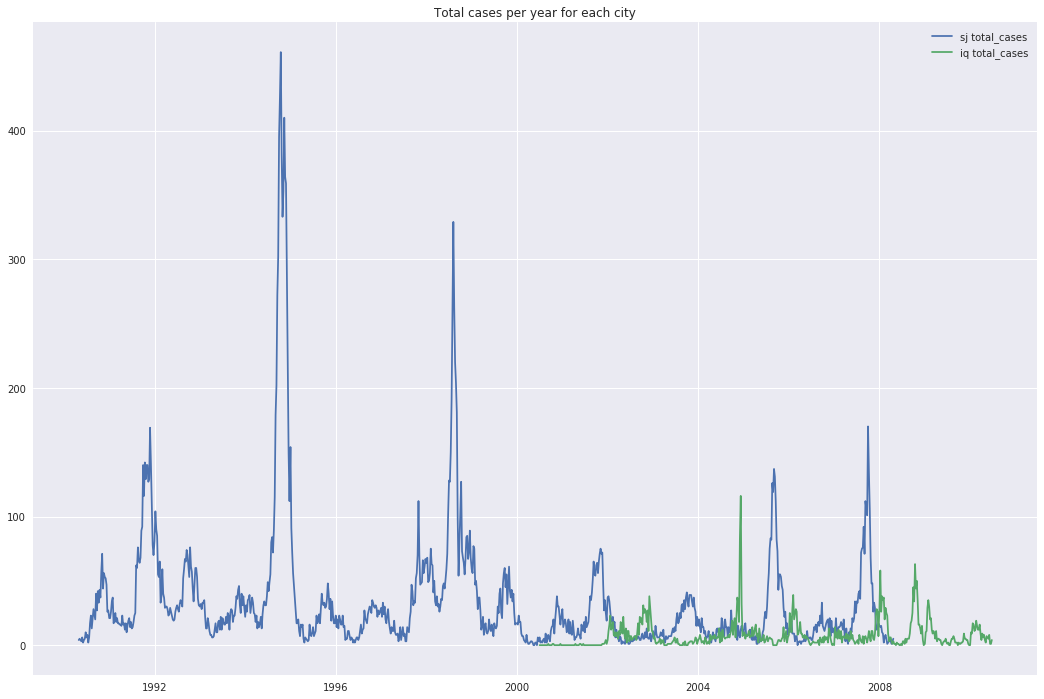

In [343]:
f = plt.figure(figsize=(18, 12))
plt.plot(train_df.loc['sj'].index.get_level_values('week_start_date'), train_df.loc['sj'].total_cases, label='sj total_cases')
plt.plot(train_df.loc['iq'].index.get_level_values('week_start_date'), train_df.loc['iq'].total_cases, label='iq total_cases')
plt.title('Total cases per year for each city')
plt.legend()
plt.savefig('./report/assets/target_visualization')

Although they look roughly similar to each other, they do not appear directly correlated.

It seems we have a period with either almost no data or with no cases for iq between 2000 and 2002

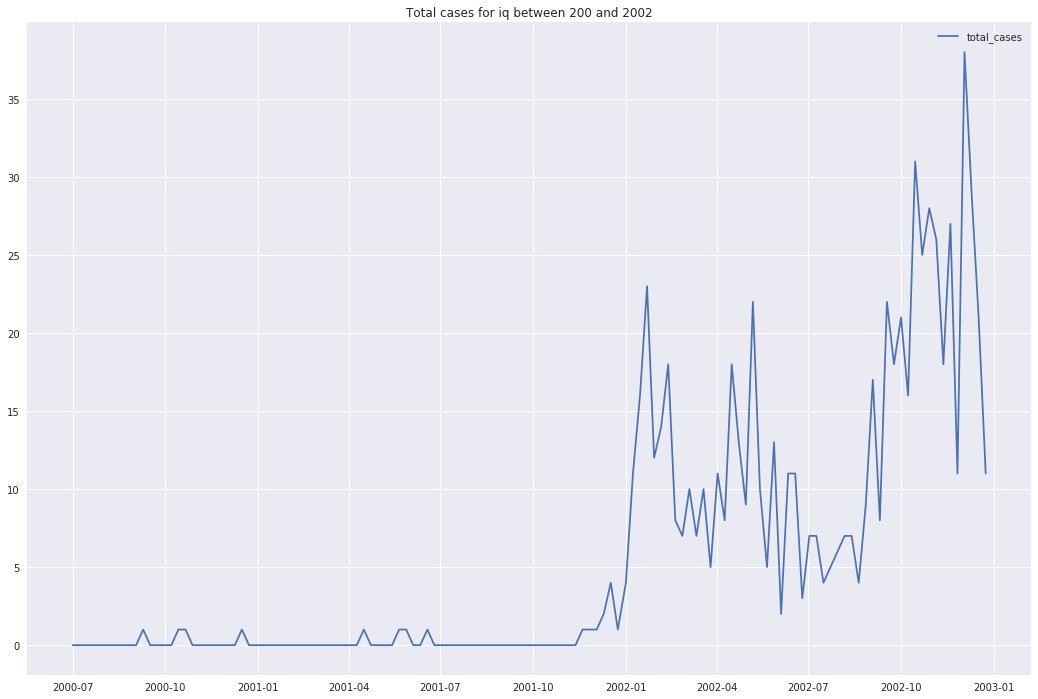

In [321]:
f = plt.figure(figsize=(18, 12))
plt.plot(train_df.loc[('iq', slice('2000', '2002')), :].index.get_level_values('week_start_date'), train_df.loc[('iq', slice('2000', '2002')), 'total_cases'])
plt.title('Total cases for iq between 200 and 2002')
plt.legend()

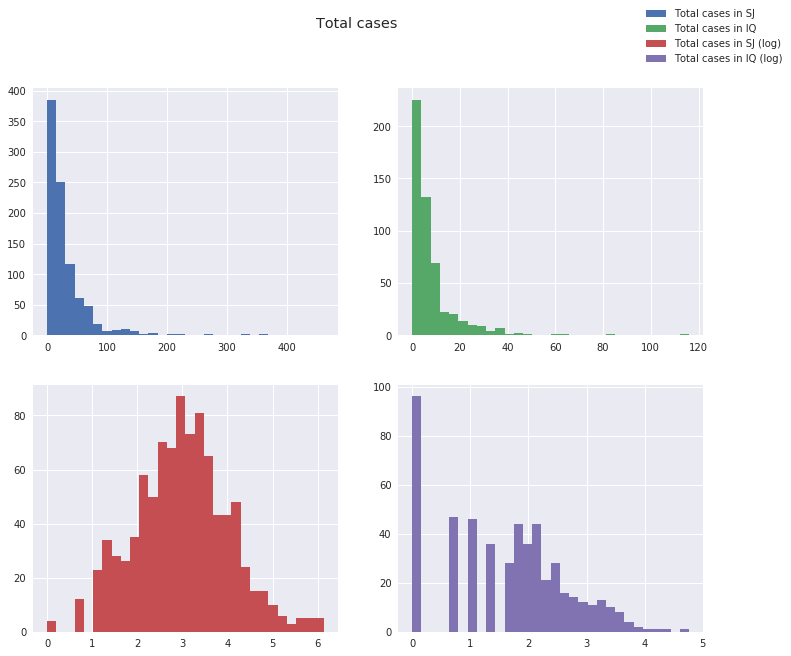

In [392]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12,10))

ax1.hist(train_df.loc['sj'].total_cases, label='Total cases in SJ', color='C0', bins=30)
ax2.hist(train_df.loc['iq'].total_cases, label='Total cases in IQ', color='C1', bins=30)
ax3.hist(train_df.loc['sj'].total_cases.transform(lambda x: np.log(1+x)), label='Total cases in SJ (log)', color='C2', bins=30)
ax4.hist(train_df.loc['iq'].total_cases.transform(lambda x: np.log(1+x)), label='Total cases in IQ (log)', color='C3', bins=30)
fig.suptitle('Total cases')
fig.legend()
plt.savefig('./report/assets/target_hist.png')
plt.show()

The target variable is left skewed and positive.

Taking the log of it allows for a more *normal* distribution

## Features vizualization

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/numpy/lib/function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/numpy/lib/function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<Figure size 1296x864 with 0 Axes>

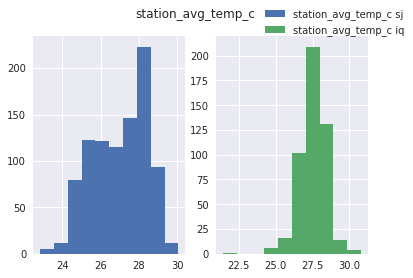

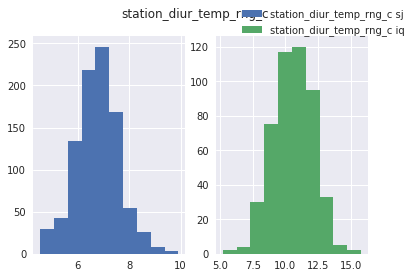

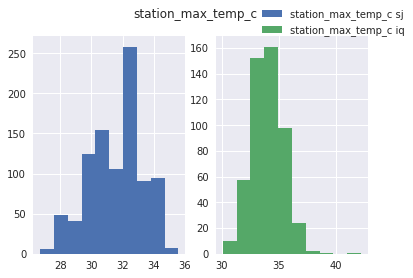

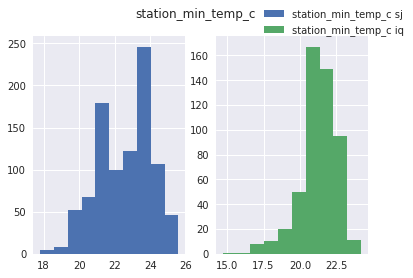

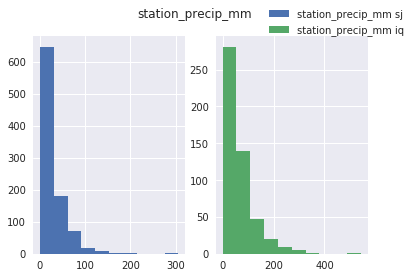

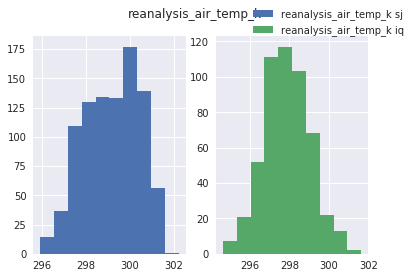

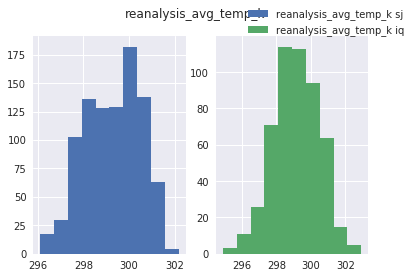

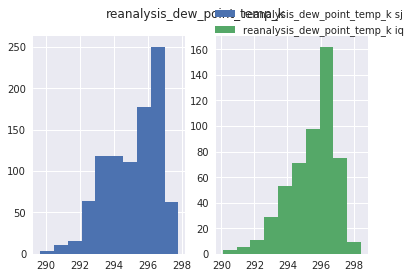

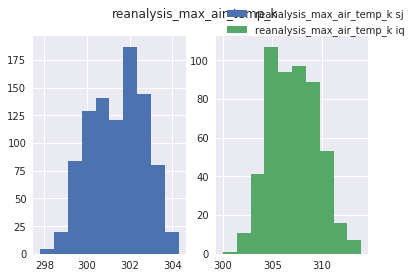

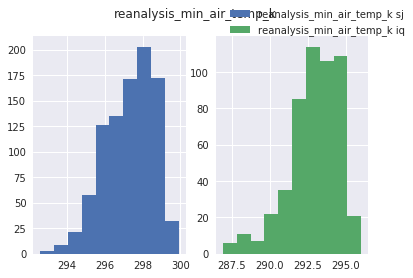

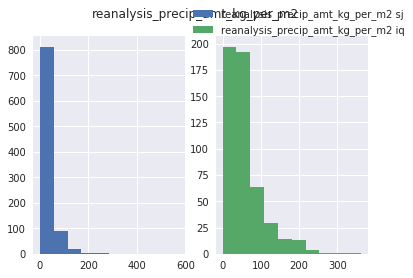

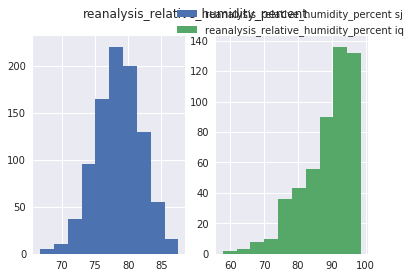

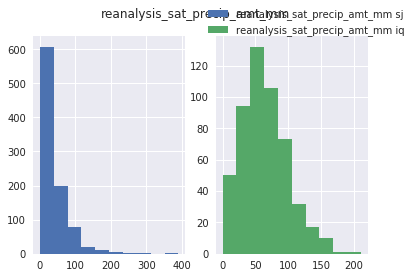

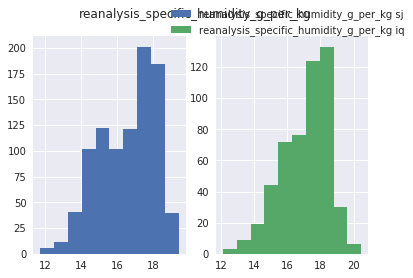

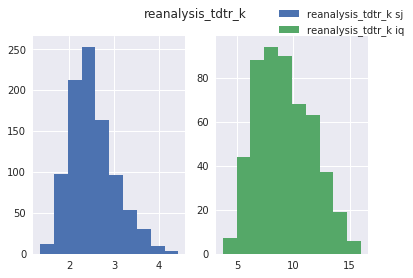

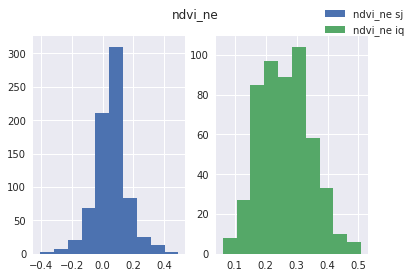

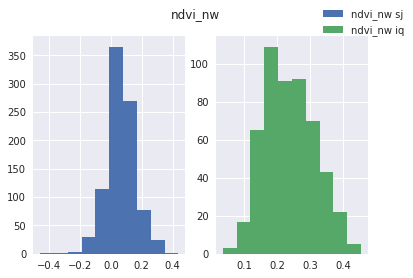

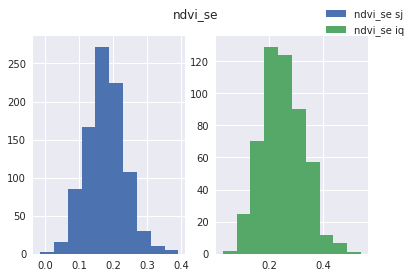

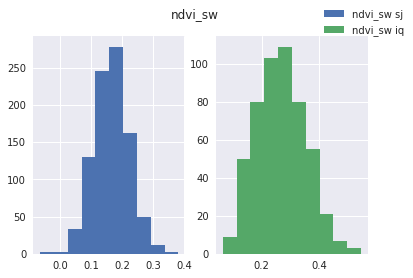

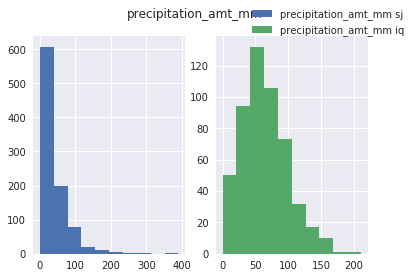

In [315]:
f = plt.figure(figsize=(18, 12))
for group, cols in cols_dict.items():
    for col in cols:
        fig, (ax1, ax2) = plt.subplots(1, 2)
        for ix, ax in enumerate([ax1, ax2]):
            fig.suptitle(col)
            ax.hist(train_df.loc[cities[ix], col], label=f'{col} {cities[ix]}', color=f'C{ix}')
        fig.legend()

Features set seem coherent between the two cities.

Distributions are quite normal for most features.

Exceptions: 

- `relative_humidty_percent` for iq which is rightly skewed
- mix and min air temperature features tends to be bimodal

## Correlations

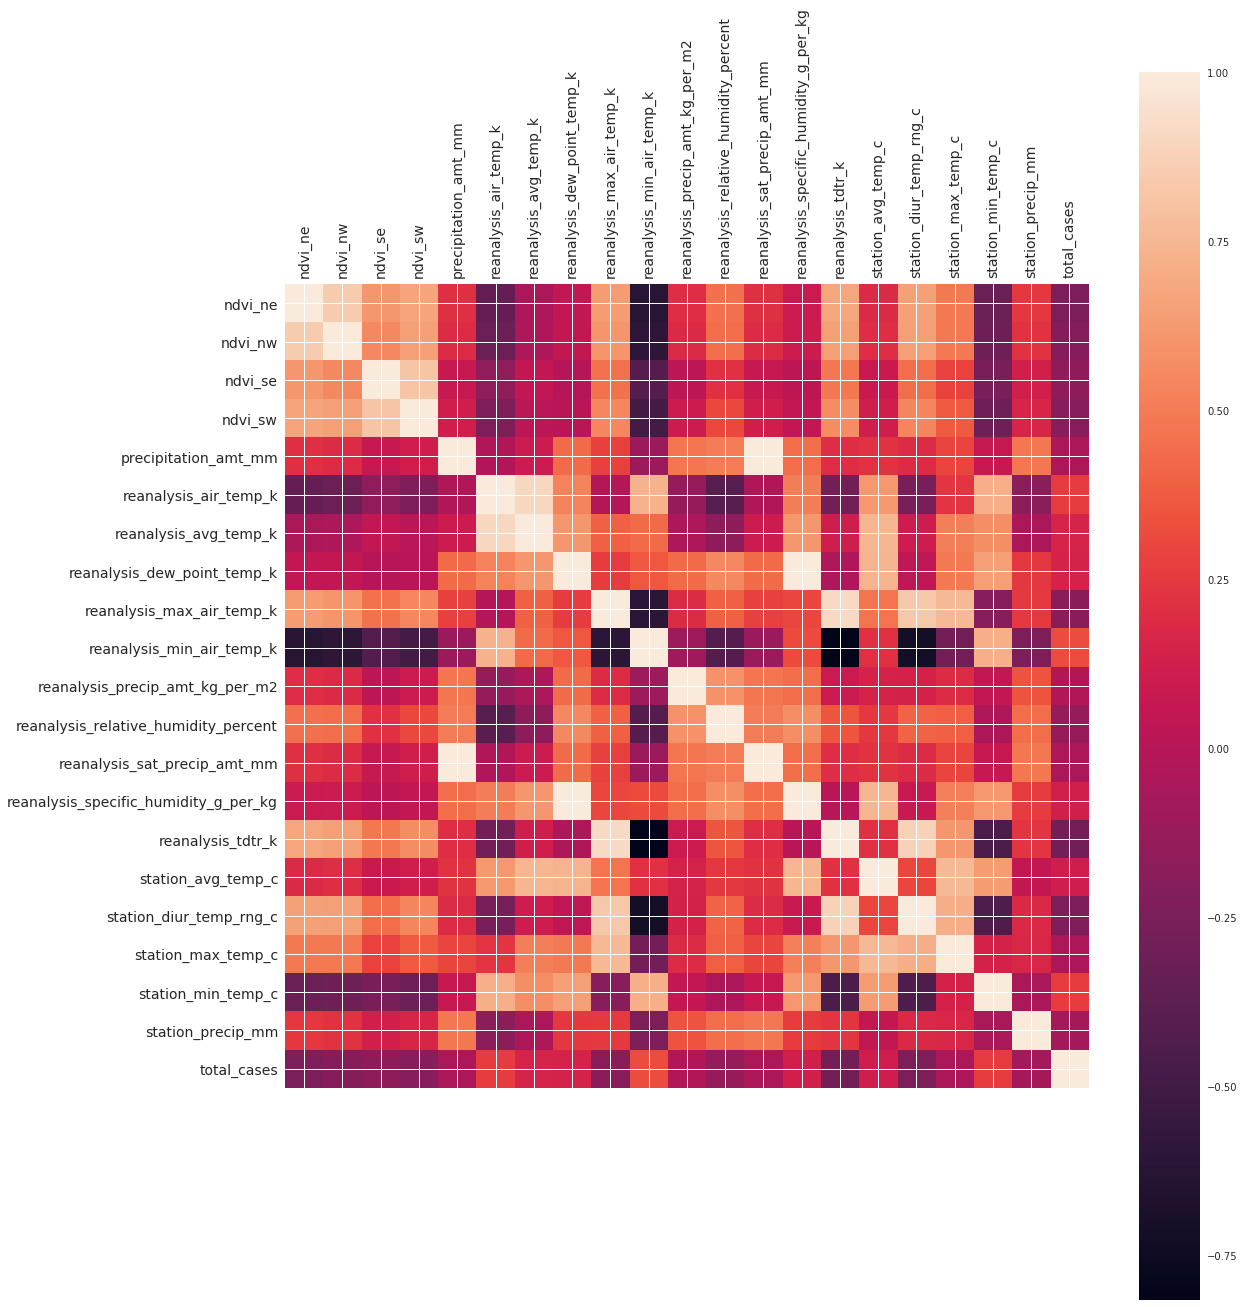

In [170]:
f = plt.figure(figsize=(18, 22))
sns.set()
train_df_corr = train_df.drop(columns=['city', 'year', 'weekofyear', 'week_start_date']).corr()
plt.matshow(train_df_corr, fignum=f.number)
plt.xticks(range(train_df_corr.shape[1]), train_df_corr.columns, fontsize=14, rotation=90)
plt.yticks(range(train_df_corr.shape[1]), train_df_corr.columns, fontsize=14)
cb = plt.colorbar()

**No directly obvious correlation between total_cases and other features**

However several are heavily correlated (to be expected since most temperature and humidity features are very similar)

### Check correlation differences between sj and iq

In [304]:
corr_city = pd.DataFrame({'iq_total':train_df.loc['iq'].corr().total_cases, 'sj_total': train_df.loc['sj'].corr().total_cases})

In [305]:
corr_city.iq_total.abs().sort_values(ascending=False).head(10)

total_cases                              1.000000
reanalysis_specific_humidity_g_per_kg    0.236476
reanalysis_dew_point_temp_k              0.230401
reanalysis_min_air_temp_k                0.214514
station_min_temp_c                       0.211702
year                                     0.179451
reanalysis_tdtr_k                        0.134425
reanalysis_relative_humidity_percent     0.130083
station_avg_temp_c                       0.113070
reanalysis_precip_amt_kg_per_m2          0.101171
Name: iq_total, dtype: float64

In [306]:
corr_city.sj_total.abs().sort_values(ascending=False).head(10)

total_cases                              1.000000
weekofyear                               0.287134
year                                     0.212690
reanalysis_specific_humidity_g_per_kg    0.207947
reanalysis_dew_point_temp_k              0.203774
station_avg_temp_c                       0.196617
reanalysis_max_air_temp_k                0.194532
station_max_temp_c                       0.189901
reanalysis_min_air_temp_k                0.187943
reanalysis_air_temp_k                    0.181917
Name: sj_total, dtype: float64

SJ seems to be much more correlated to the time of the year than IQ.

We see that a few features (`reanalysis_specific_humidity_g_per_kg` and `reanalysis_dew_point_temp_k` for instance) are correlated in both cases.

### Intra group of features correlations

In [175]:
train_df[ndvi_cols].corr().abs().style.format("{:.3}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw
ndvi_ne,1.0,0.851,0.614,0.67
ndvi_nw,0.851,1.0,0.556,0.652
ndvi_se,0.614,0.556,1.0,0.821
ndvi_sw,0.67,0.652,0.821,1.0


In [176]:
train_df[station_cols].corr().abs().style.format("{:.3}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
station_avg_temp_c,1.0,0.304,0.765,0.633,0.0631
station_diur_temp_rng_c,0.304,1.0,0.715,0.439,0.18
station_max_temp_c,0.765,0.715,1.0,0.141,0.167
station_min_temp_c,0.633,0.439,0.141,1.0,0.0501
station_precip_mm,0.0631,0.18,0.167,0.0501,1.0


In [177]:
train_df[forecast_cols].corr().abs().style.format("{:.3}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k
reanalysis_air_temp_k,1.0,0.902,0.53,0.00121,0.737,0.128,0.402,0.0172,0.508,0.28
reanalysis_avg_temp_k,0.902,1.0,0.614,0.398,0.437,0.0317,0.168,0.106,0.612,0.124
reanalysis_dew_point_temp_k,0.53,0.614,1.0,0.257,0.362,0.433,0.554,0.435,0.997,0.0335
reanalysis_max_air_temp_k,0.00121,0.398,0.257,1.0,0.601,0.192,0.4,0.283,0.3,0.919
reanalysis_min_air_temp_k,0.737,0.437,0.362,0.601,1.0,0.106,0.411,0.12,0.319,0.816
reanalysis_precip_amt_kg_per_m2,0.128,0.0317,0.433,0.192,0.106,1.0,0.594,0.481,0.453,0.094
reanalysis_relative_humidity_percent,0.402,0.168,0.554,0.4,0.411,0.594,1.0,0.5,0.578,0.36
reanalysis_sat_precip_amt_mm,0.0172,0.106,0.435,0.283,0.12,0.481,0.5,1.0,0.451,0.201
reanalysis_specific_humidity_g_per_kg,0.508,0.612,0.997,0.3,0.319,0.453,0.578,0.451,1.0,0.0129
reanalysis_tdtr_k,0.28,0.124,0.0335,0.919,0.816,0.094,0.36,0.201,0.0129,1.0


### Inter group of features correlations

In [178]:
train_df[station_cols].apply(lambda x: train_df[forecast_cols].corrwith(x)).abs().style.format("{:.3}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
reanalysis_air_temp_k,0.62,0.261,0.228,0.72,0.174
reanalysis_avg_temp_k,0.751,0.108,0.512,0.58,0.0481
reanalysis_dew_point_temp_k,0.744,0.0372,0.492,0.652,0.241
reanalysis_max_air_temp_k,0.47,0.834,0.763,0.194,0.251
reanalysis_min_air_temp_k,0.217,0.716,0.271,0.721,0.237
reanalysis_precip_amt_kg_per_m2,0.149,0.139,0.196,0.0568,0.349
reanalysis_relative_humidity_percent,0.243,0.406,0.396,0.0426,0.451
reanalysis_sat_precip_amt_mm,0.225,0.193,0.296,0.0767,0.487
reanalysis_specific_humidity_g_per_kg,0.748,0.0803,0.519,0.623,0.256
reanalysis_tdtr_k,0.217,0.881,0.613,0.452,0.233


In [179]:
train_df[ndvi_cols].apply(lambda x: train_df[station_cols].corrwith(x)).abs().style.format("{:.3}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw
station_avg_temp_c,0.186,0.204,0.0892,0.121
station_diur_temp_rng_c,0.658,0.649,0.45,0.546
station_max_temp_c,0.492,0.49,0.291,0.377
station_min_temp_c,0.316,0.304,0.252,0.295
station_precip_mm,0.242,0.221,0.131,0.158


In [180]:
train_df[ndvi_cols].apply(lambda x: train_df[forecast_cols].corrwith(x)).abs().style.format("{:.3}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw
reanalysis_air_temp_k,0.341,0.318,0.157,0.228
reanalysis_avg_temp_k,0.0377,0.031,0.0513,0.0225
reanalysis_dew_point_temp_k,0.0561,0.0633,0.00281,0.0207
reanalysis_max_air_temp_k,0.634,0.607,0.468,0.546
reanalysis_min_air_temp_k,0.623,0.589,0.408,0.494
reanalysis_precip_amt_kg_per_m2,0.199,0.191,0.0348,0.102
reanalysis_relative_humidity_percent,0.458,0.449,0.216,0.312
reanalysis_sat_precip_amt_mm,0.206,0.194,0.0746,0.124
reanalysis_specific_humidity_g_per_kg,0.0949,0.101,0.0288,0.0534
reanalysis_tdtr_k,0.674,0.646,0.486,0.57


## A few features of interest

Additional plots for a few features that seems promising

In [226]:
columns = ['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'total_cases']

features = ['reanalysis_avg_temp_k', 'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k', 'reanalysis_specific_humidity_g_per_kg']

We can plot these features along the target for both cities between 2002 and 2008 since we have data for both

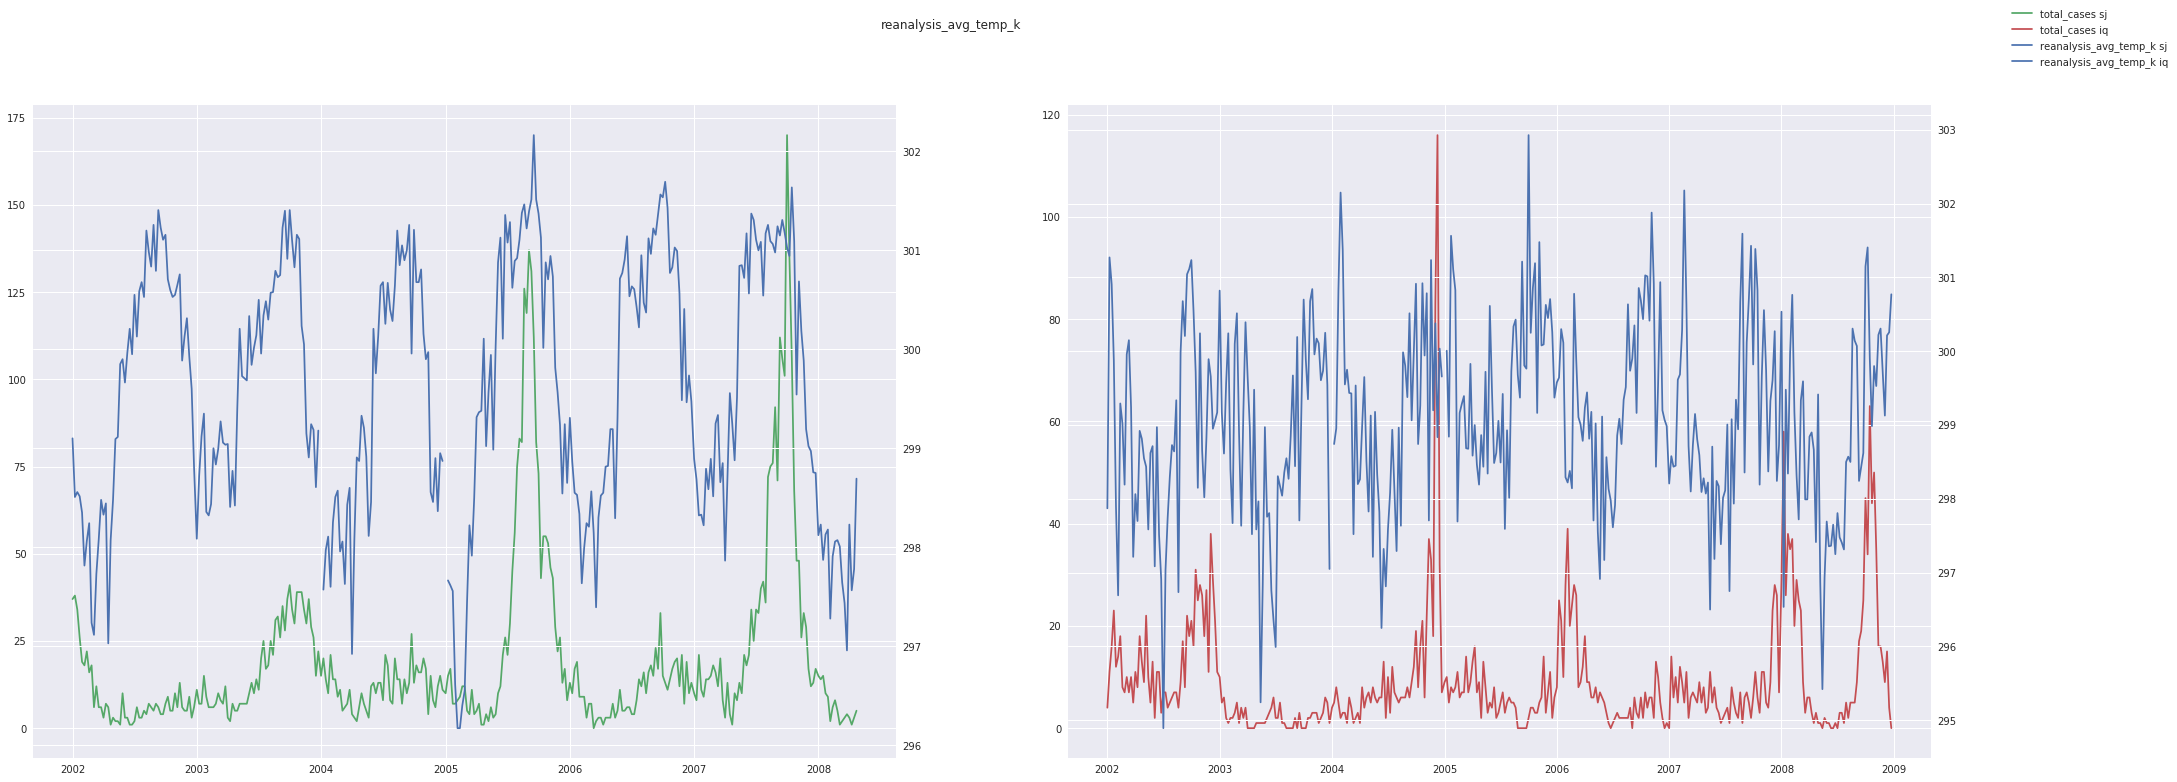

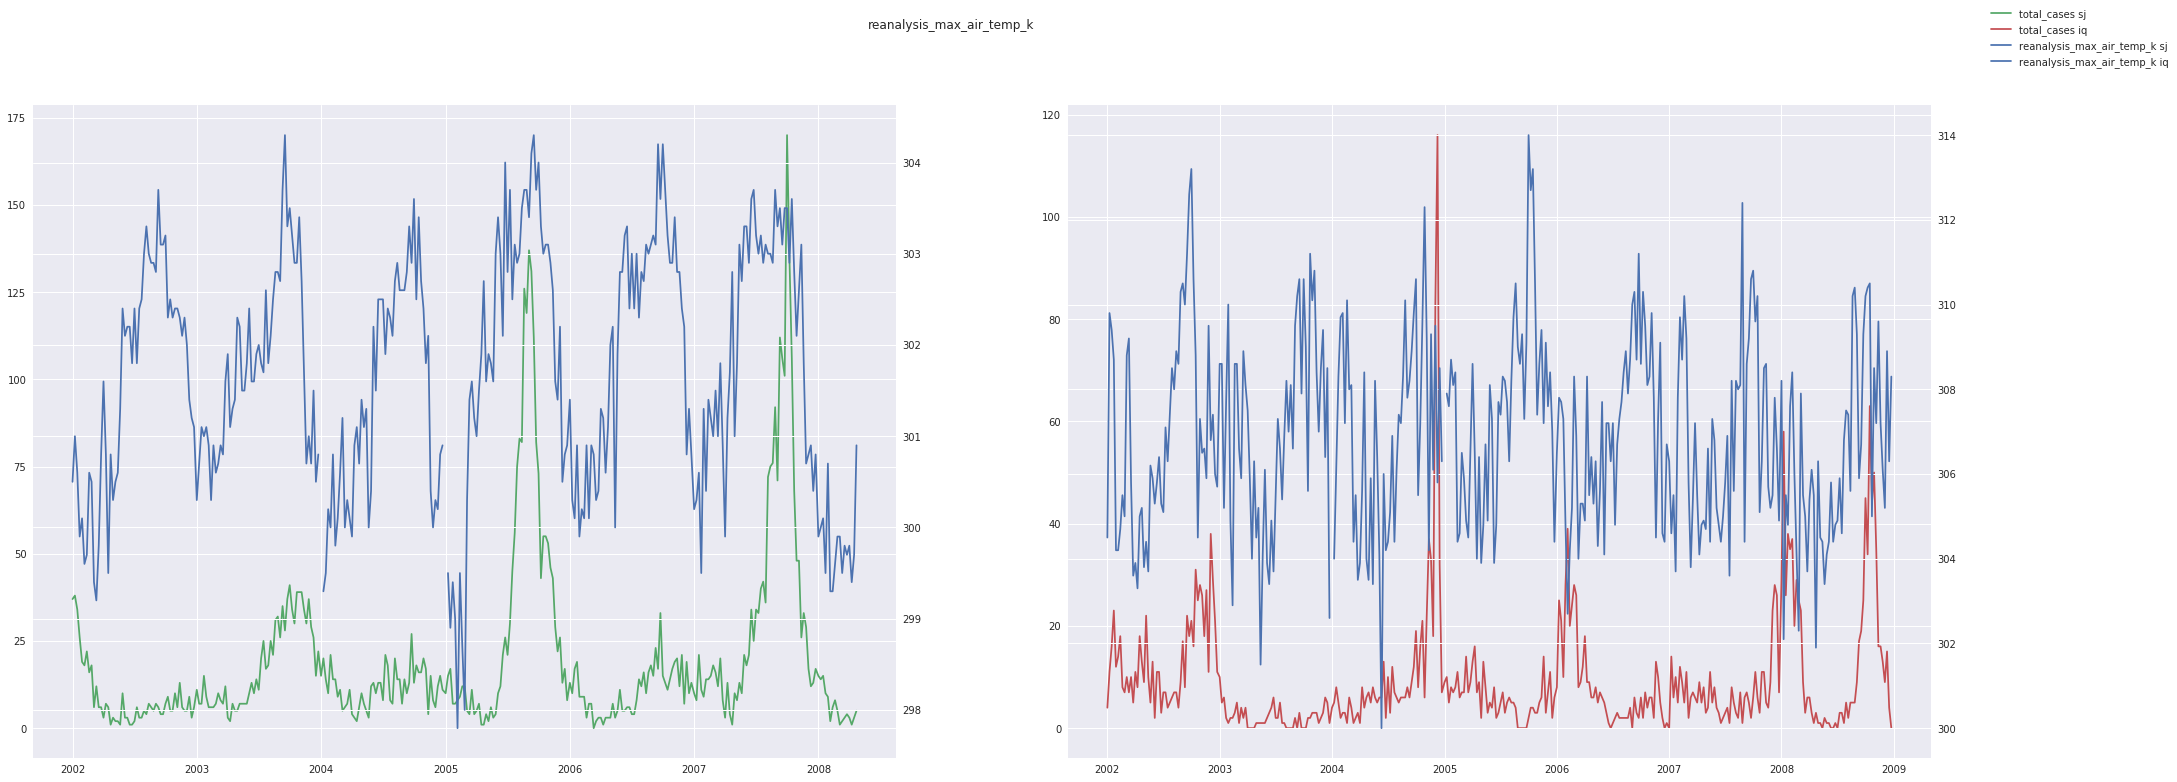

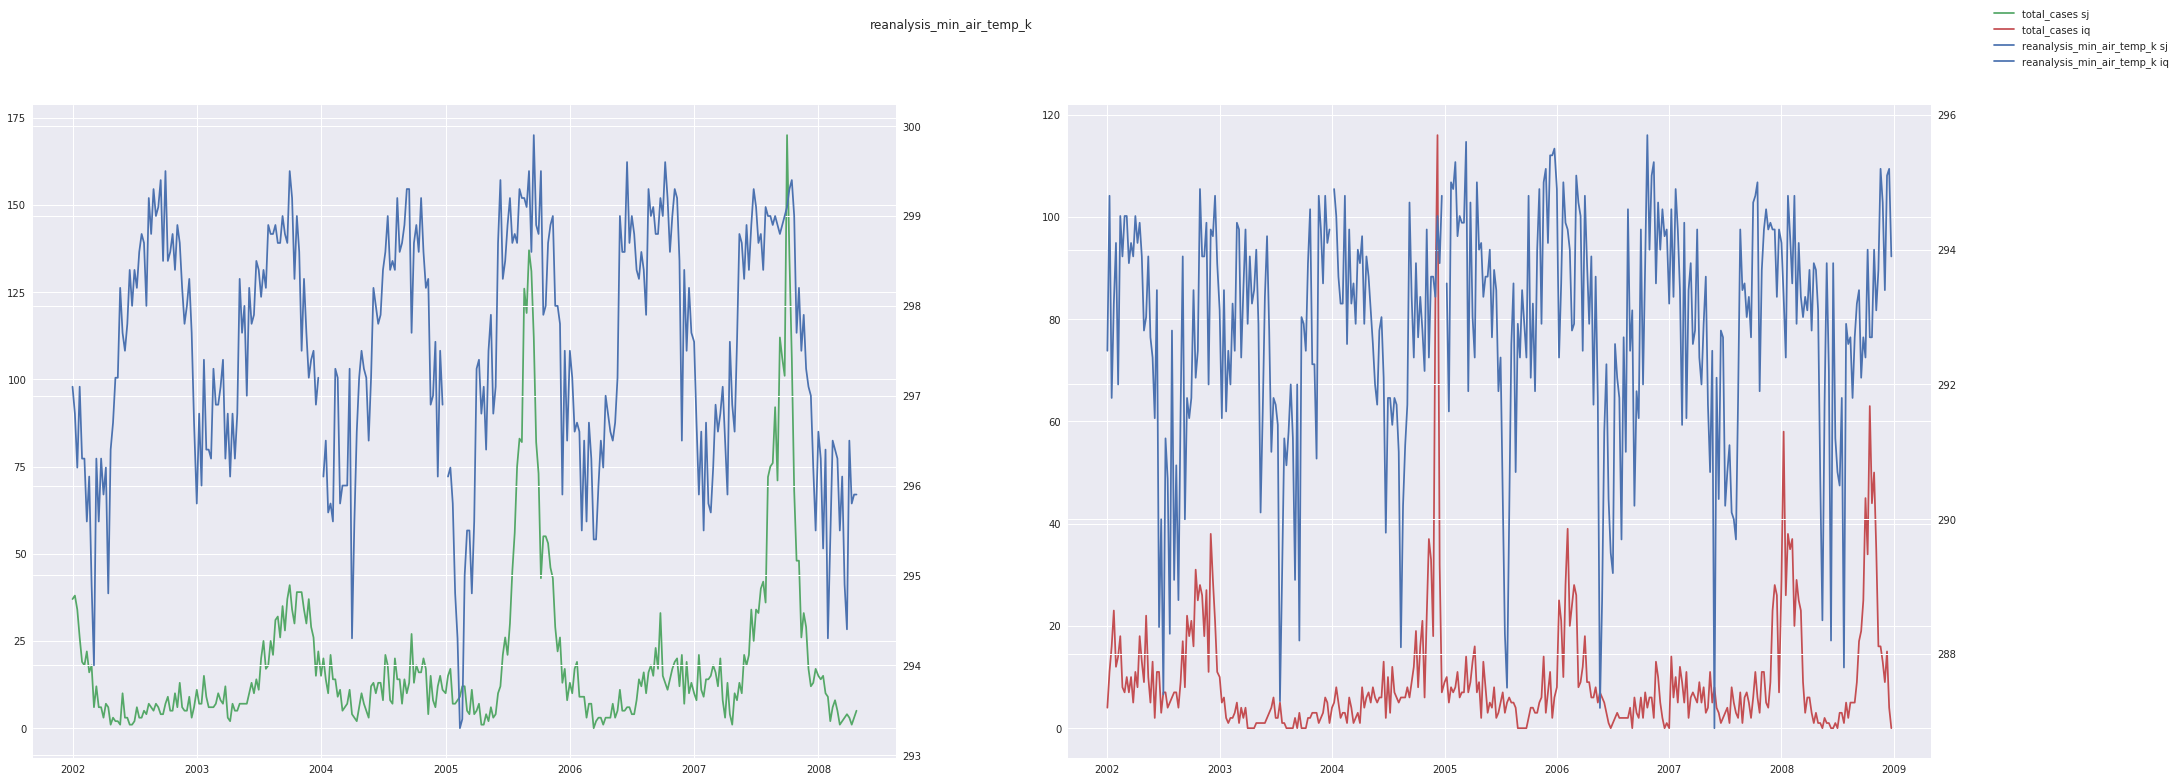

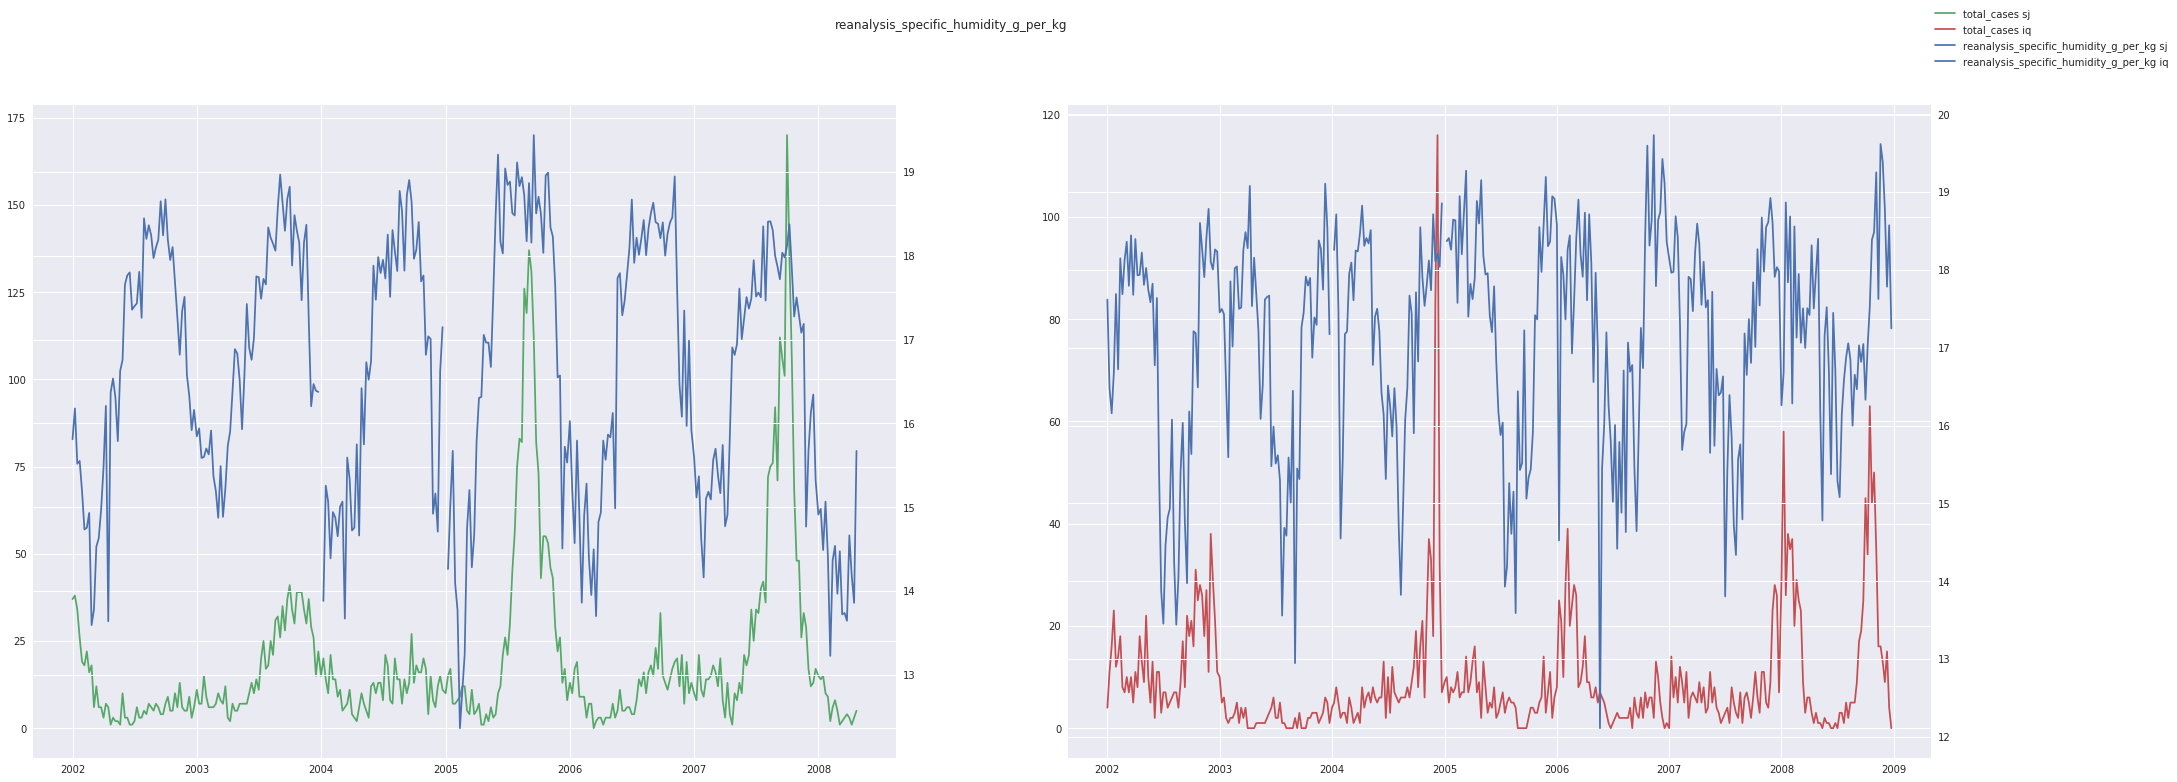

In [324]:
for col in features:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(34, 12))
    for ix, ax in enumerate([ax1, ax2]):
        fig.suptitle(col)
        ax.plot(train_df.loc[(cities[ix], slice('2002', '2008')), :].index.get_level_values('week_start_date'), train_df.loc[(cities[ix], slice('2002', '2008')), 'total_cases'], label=f'total_cases {cities[ix]}', color=f'C{ix+1}')
        ax.twinx().plot(train_df.loc[(cities[ix], slice('2002', '2008')), :].index.get_level_values('week_start_date'), train_df.loc[(cities[ix], slice('2002', '2008')), col], label=f'{col} {cities[ix]}')
    fig.legend()
        

Closer look at distributions

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/numpy/lib/function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/numpy/lib/function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


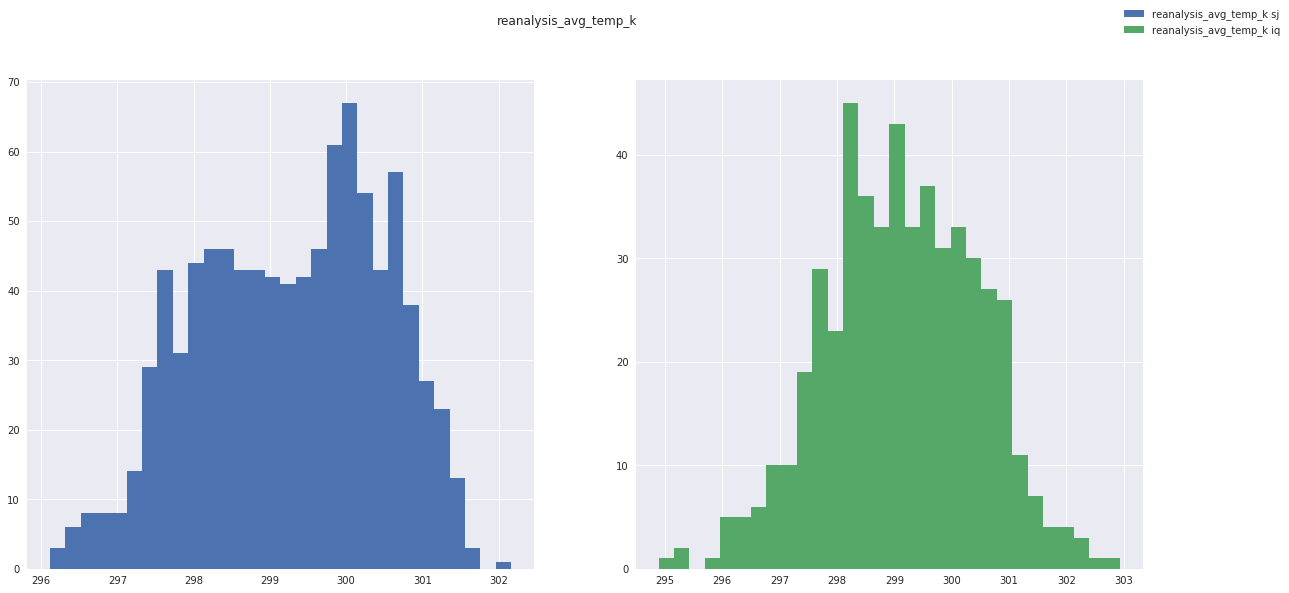

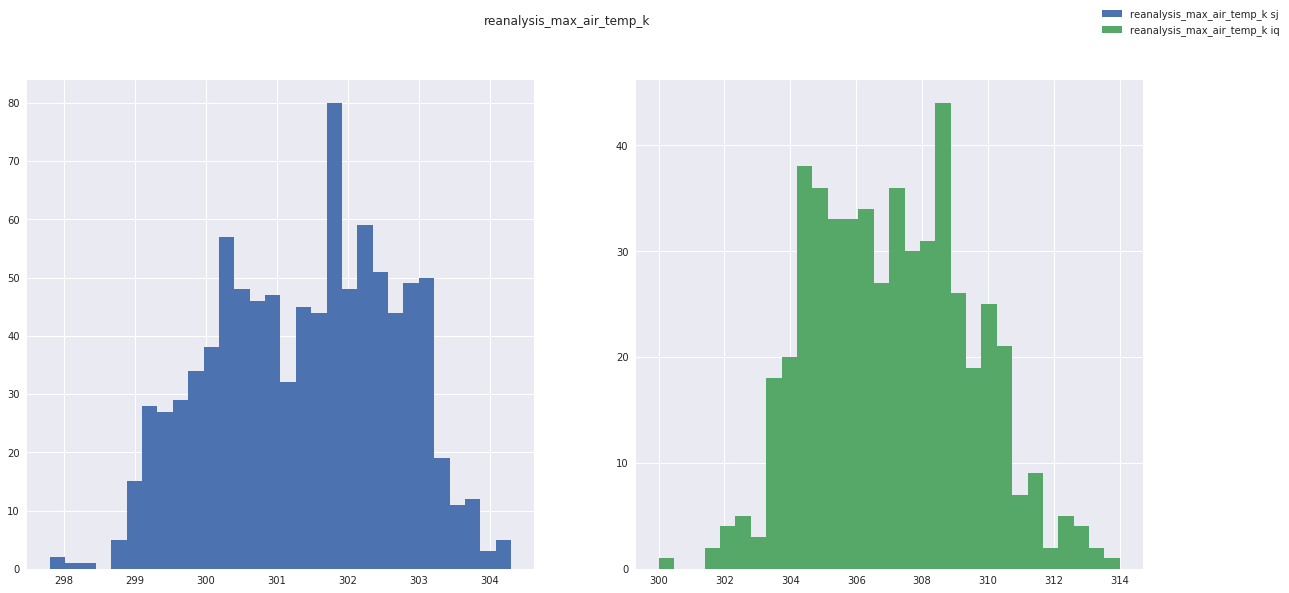

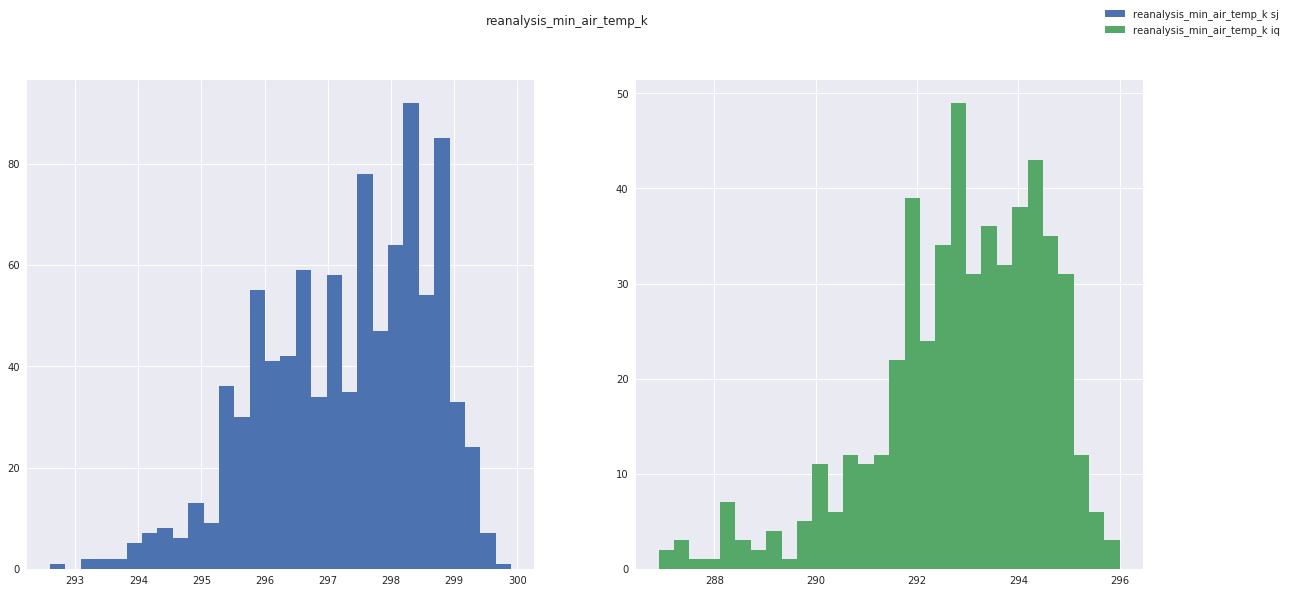

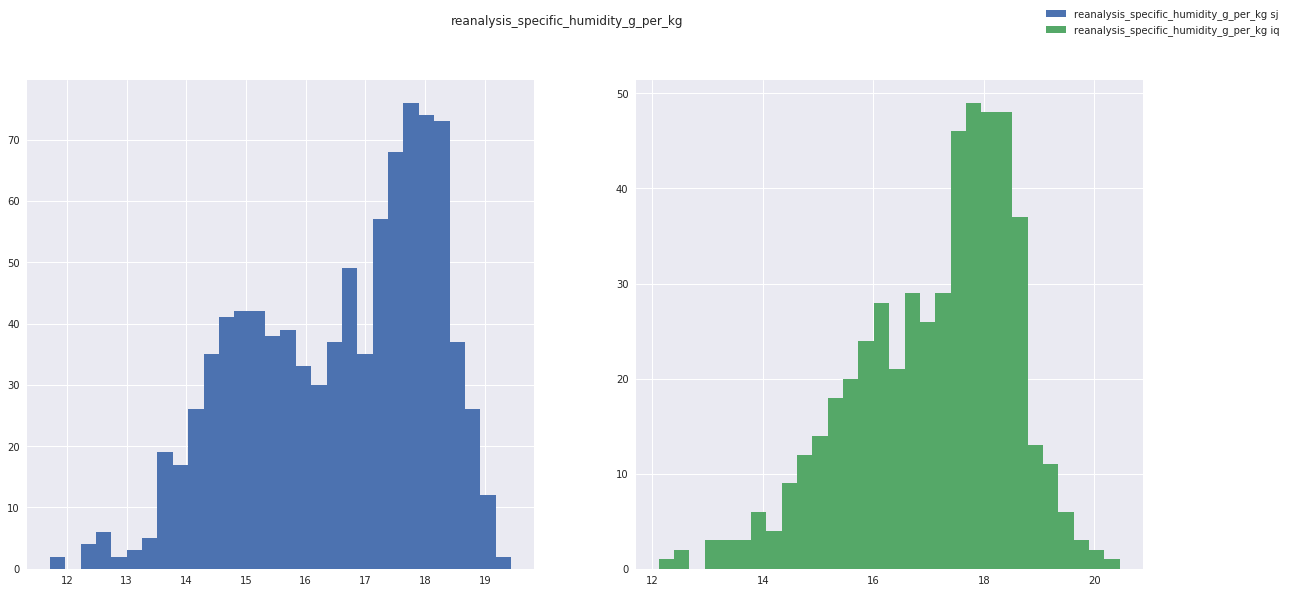

In [327]:
for col in features:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 9))
    for ix, ax in enumerate([ax1, ax2]):
        fig.suptitle(col)
        ax.hist(train_df.loc[cities[ix], col], label=f'{col} {cities[ix]}', color=f'C{ix}', bins=30)
    fig.legend()